# ASSIGNMENT : IRIS MULTI-CLASS CLASSIFICATION

###### Purpose :
To predict the species of flower .
###### Description :
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).
###### Requirements :
1) Code must be in tf 2.0 .

2) Accuracy must be in between 95-97% .

3) Model shouldn't be Overfit (You can add drop out layer for this) .

### STEP 1 : Load all the necessary libraries 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### STEP 2 : Data Preparation
This step consists of multiple sub steps from data loading [download](https://github.com/ramsha275/PIAIC-Sir-Anees-Quarter-2/blob/master/Deep%20Learning/iris.csv),shuffling ,spliting in **Train** and **Test** sets to one-hot-enconding on labels . 


In [2]:
# loading of data 
iris = pd.read_csv("iris.csv")

In [11]:
# shuffling of data
iris = iris.sample(frac=1)

In [12]:
# dim of dataframe
print(iris.shape)


(150, 5)


In [18]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
iris['variety']= label_encoder.fit_transform(iris['variety']) 
  
iris['variety'].unique()

array([2, 0, 1], dtype=int64)

In [19]:
# spliting of data into train,test and validation sets with unique variable name.
features = np.array(iris.drop(["variety"],axis=1))
labels = np.array(iris["variety"])
x_train = features[:60]
y_train = labels[:60]
x_test = features[60:105]
y_test = labels[60:105]
x_val = features[105:]
y_val = labels[105:]

### STEP 3 : Model Architecture 


###### Input : 4 
###### 1 hidden Layer : 8 nodes
###### Output : 3

In [20]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(52, activation='relu', input_shape=(4,)),
  tf.keras.layers.Dense(27, activation="relu"),
  tf.keras.layers.Dense(9 , activation="relu"),
  tf.keras.layers.Dense(3 , activation="sigmoid")
])

### STEP 4 : Compilation Step 

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
epoch = 100
history = model.fit(x_train, y_train, epochs=epoch,validation_data=(x_val,y_val))
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]

Train on 60 samples, validate on 45 samples
Epoch 1/100
60/60 [==============================] - 1s 21ms/sample - loss: 1.0480 - accuracy: 0.2667 - val_loss: 1.0273 - val_accuracy: 0.3333
Epoch 2/100
60/60 [==============================] - 0s 1ms/sample - loss: 0.9996 - accuracy: 0.2667 - val_loss: 1.0010 - val_accuracy: 0.3333
Epoch 3/100
60/60 [==============================] - 0s 1ms/sample - loss: 0.9733 - accuracy: 0.2833 - val_loss: 0.9784 - val_accuracy: 0.3778
Epoch 4/100
60/60 [==============================] - 0s 1ms/sample - loss: 0.9491 - accuracy: 0.5167 - val_loss: 0.9569 - val_accuracy: 0.5111
Epoch 5/100
60/60 [==============================] - 0s 1ms/sample - loss: 0.9208 - accuracy: 0.6333 - val_loss: 0.9393 - val_accuracy: 0.2889
Epoch 6/100
60/60 [==============================] - 0s 1ms/sample - loss: 0.9018 - accuracy: 0.5500 - val_loss: 0.9224 - val_accuracy: 0.2667
Epoch 7/100
60/60 [==============================] - 0s 1ms/sample - loss: 0.8824 - accuracy: 0.4

60/60 [==============================] - 0s 1ms/sample - loss: 0.2409 - accuracy: 0.9667 - val_loss: 0.2854 - val_accuracy: 0.9556
Epoch 58/100
60/60 [==============================] - 0s 1ms/sample - loss: 0.2337 - accuracy: 0.9667 - val_loss: 0.2909 - val_accuracy: 0.9556
Epoch 59/100
60/60 [==============================] - 0s 1ms/sample - loss: 0.2282 - accuracy: 0.9667 - val_loss: 0.2962 - val_accuracy: 0.9111
Epoch 60/100
60/60 [==============================] - 0s 1ms/sample - loss: 0.2223 - accuracy: 0.9667 - val_loss: 0.2885 - val_accuracy: 0.9556
Epoch 61/100
60/60 [==============================] - 0s 1ms/sample - loss: 0.2177 - accuracy: 0.9667 - val_loss: 0.2724 - val_accuracy: 0.9556
Epoch 62/100
60/60 [==============================] - 0s 1ms/sample - loss: 0.2116 - accuracy: 0.9667 - val_loss: 0.2681 - val_accuracy: 0.9556
Epoch 63/100
60/60 [==============================] - 0s 1000us/sample - loss: 0.2066 - accuracy: 0.9667 - val_loss: 0.2587 - val_accuracy: 0.9556
Ep

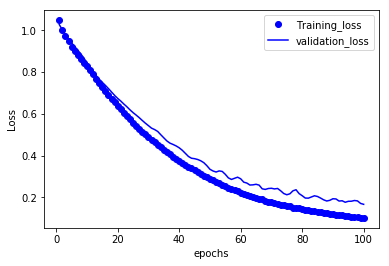

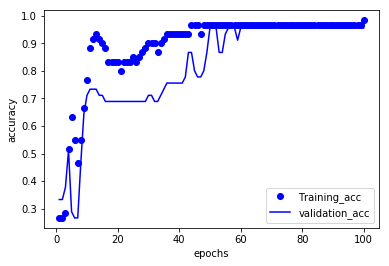

In [23]:
# for loss
 
epochs = range(1, len(acc)+1)
plt.plot(epochs,loss,"bo",label = "Training_loss")
plt.plot(epochs,val_loss,"b",label = "validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# for accuracy
 
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc)+1)
plt.plot(epochs,acc,"bo",label = "Training_acc")
plt.plot(epochs,val_acc,"b",label = "validation_acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### STEP 5 : Evaluation 

In [24]:
loss , accuracy = model.evaluate(x_test,  y_test, verbose=2)    

45/1 - 0s - loss: 0.1519 - accuracy: 0.9778


### STEP 6 : Prediction 

In [30]:
new_data = np.array([[4.0,4.9,1.0,4.2]])
prediction = model.predict_classes(x_test)
print(prediction)
print(y_test)
'''pred = int(prediction)
print(f"Predicted Encoded label: {pred}")

s = {0:"Setosa",1:"Versicolor",2:"verginica"}


if pred == 0:
    print("Flower specie is: ",s[0])
elif pred == 1:
    print("Flower specie is: ",s[1])
elif pred == 2:
    print("Flower specie is: ",s[2])
else:
    print("There is error in your code!!!")'''

[2 1 1 2 1 1 2 1 2 1 0 0 1 1 0 0 2 2 2 1 0 2 2 0 1 2 1 1 1 0 1 0 1 2 0 1 1
 2 0 0 2 2 1 2 2]
[2 1 1 2 1 1 2 1 2 1 0 0 1 1 0 0 2 2 2 1 0 2 2 0 1 2 1 1 1 0 1 0 1 2 0 1 1
 2 0 0 2 2 1 1 2]


'pred = int(prediction)\nprint(f"Predicted Encoded label: {pred}")\n\ns = {0:"Setosa",1:"Versicolor",2:"verginica"}\n\n\nif pred == 0:\n    print("Flower specie is: ",s[0])\nelif pred == 1:\n    print("Flower specie is: ",s[1])\nelif pred == 2:\n    print("Flower specie is: ",s[2])\nelse:\n    print("There is error in your code!!!")'